---
title: 
teaching: 45
exercises: 2
keypoints:
- "PCA transforms your original data by projecting it into new axes"
- "primary components are orthogonal vectors through your data that explain the most variability"
objectives:
- "explain the overall process of PCA"
- "explain the result of a PCA operation"
- "define a primary component"
- "define dimensionality reduction"
- "explain how PCA can be used as a dimensionality reduction technique"
questions:
- ""
---

# PCA part 2

# What Just Happened !?

## Intuition: 

#### PCA is a way to rotate the *axes* of your dataset around the *data* so that the axes line up with the *directions of the greatest variation* through the data.



# 2d PCA example - get orientation/intuition.

1. show two variables
1. show PCA result
1. intuition is rotated axes
1. each new axis is a % of other axes now.
1. you can scale that to n dimensions.

keep detail of PCA minimized below - keep them in here. those 5 steps won't build extra intuition though.

### relationship between two variables x and y

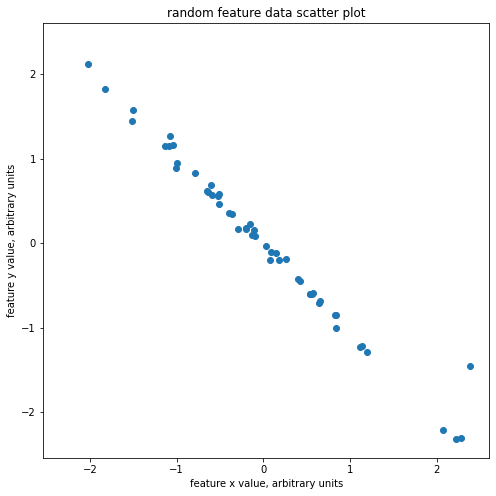

In [2]:
# Here is a random data feature, re-run until you like it:
from helper_functions import create_feature_scatter_plot
feature_ax, features, axlims = create_feature_scatter_plot(random_state=13)

### PCA of those two variables 

In [3]:
from sklearn.decomposition import PCA
p = PCA(n_components=2)  # instantiate PCA transform
features_pca = p.fit_transform(features)  # perform PCA and re-project data 

### plot PCA result

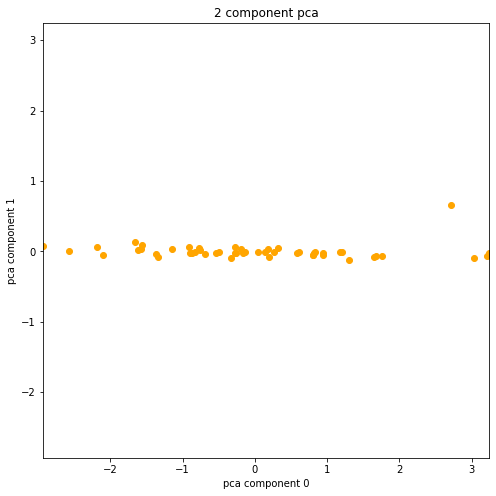

In [4]:
import matplotlib.pyplot as plt
from helper_functions import plot_pca_features
fig, ax, (ax_min, ax_max) = plot_pca_features(features_pca)
plt.show()


# original and PCA result comparison

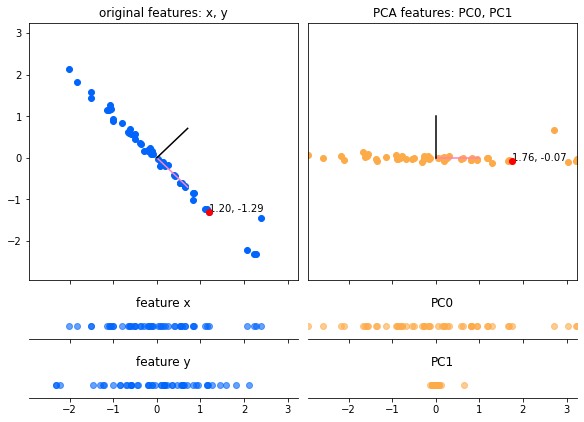

In [17]:
from helper_functions import plot_pca_feature_comparison

point_to_highlight=10
plot_pca_feature_comparison(features, features_pca, ax_max, ax_min, p, point_to_highlight)
plt.show()


# The process of PCA is analagous to walking around your data and looking at it from a new angle

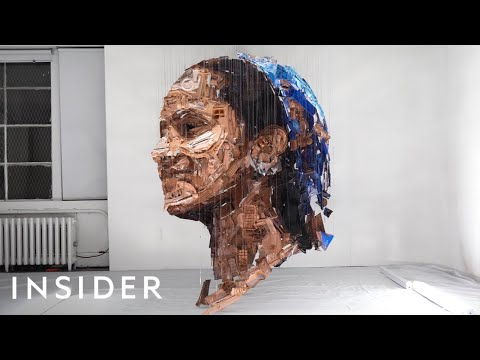

In [9]:
from IPython.display import YouTubeVideo
YouTubeVideo("BorcaCtjmog")

# 3d data example

https://setosa.io/ev/principal-component-analysis/

## this rotation of the axes, mean that new pca axes are made up of *proportions* of the old axes

## what are those proportions? 
### The pca "components_" property, or the eigenvectors of each primary component

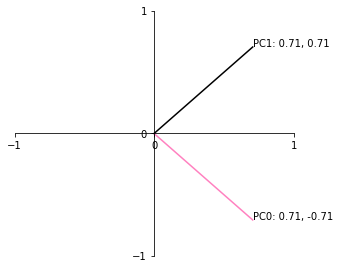

In [11]:
from helper_functions import show_pcs_on_unit_axes

show_pcs_on_unit_axes(p)
plt.show()
    

In [12]:
for i, pc in enumerate(p.components_):
    print(f"PC{i}: {pc}")
    

PC0: [ 0.70710678 -0.70710678]
PC1: [0.70710678 0.70710678]


## demonstrate transform of one point from original feature space to PC-space

In [18]:
fmt_str = "{:.2f}, {:.2f}"
print("START in feature space:")
print(fmt_str.format(features[point_to_highlight,0],features[point_to_highlight,1]))
print()
print("END: in pca space:")
print(fmt_str.format(features_pca[point_to_highlight,0], features_pca[point_to_highlight,1]))


START in feature space:
1.20, -1.29

END: in pca space:
1.76, -0.07


### step 1 scale feature space data

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features_scaled = scaler.fit(features).transform(features)

print("scaled feature space:")
print("{:.2f}, {:.2f}".format(
    features_scaled[point_to_highlight, 0], 
    features_scaled[point_to_highlight, 1])
    )

scaled feature space:
1.20, -1.29


### step 2 get dot product of feature space values and  principle component eigenvectors

In [20]:
# use both x and y coords of original point here as new pc0-coord is combination of both axes!
print("{:.2f}".format( 
    # first dimension of example point * first dimension of PC0 eigenvector
    features_scaled[point_to_highlight, 0] * p.components_[0,0] 
    +
    # second dimension of example point * second dimension of PC0 eigenvector
    features_scaled[point_to_highlight, 1] * p.components_[0,1]
    )
)

1.76


In [21]:
# Again: use both x and y coords of original point here as new pc1-coord is combination of both axes!
print("{:.2f}".format( 
    # first dimension of example point * first dimension of PC1 eigenvector
    features_scaled[point_to_highlight, 0] * p.components_[1,0] 
    +
    # first dimension of example point * first dimension of PC1 eigenvector
    features_scaled[point_to_highlight, 1] * p.components_[1,1]
    )
)

-0.07


## this is called a dimensionality REDUCTION technique, because one dimension now explains more of the variability of your data

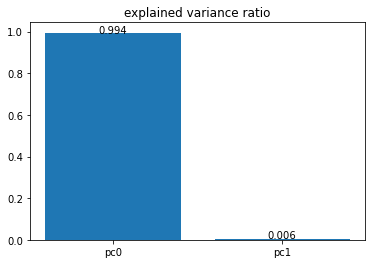

In [22]:
fig, ax = plt.subplots()
x = ["pc0", "pc1"]
ax.bar(x, p.explained_variance_ratio_)
for i in range(len(x)):
    plt.text(x=i, y=p.explained_variance_ratio_[i], 
             s="{:.3f}".format(p.explained_variance_ratio_[i]), 
             ha="center")
ax.set_title("explained variance ratio")
plt.show()